In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [26]:
# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

In [37]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
Y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling for SVM and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', gamma='scale', random_state=42),
    "Naive Bayes": GaussianNB()
}

In [32]:
print(models.items())

dict_items([('Decision Tree', DecisionTreeClassifier(random_state=42)), ('KNN', KNeighborsClassifier()), ('SVM', SVC(random_state=42)), ('Naive Bayes', GaussianNB())])


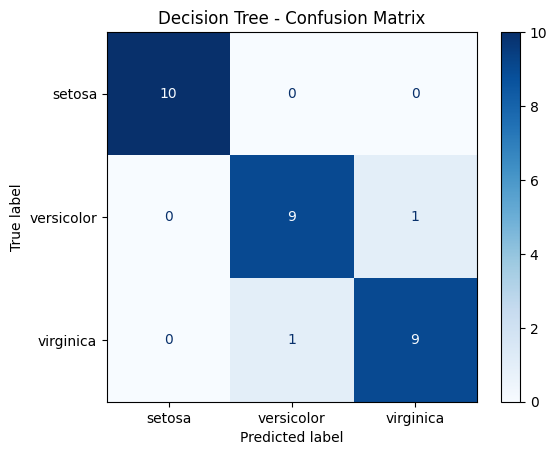

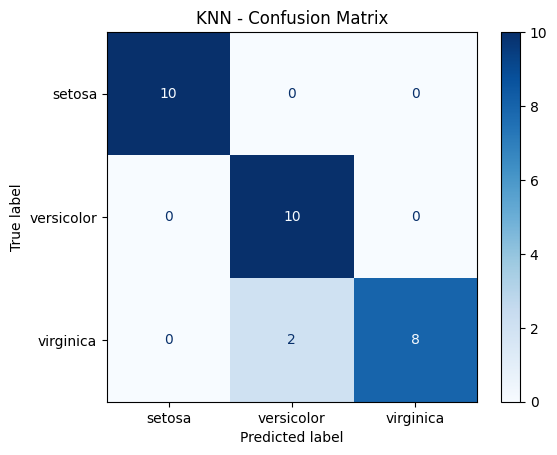

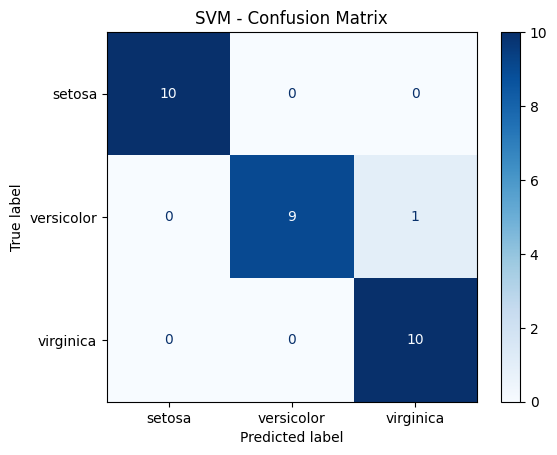

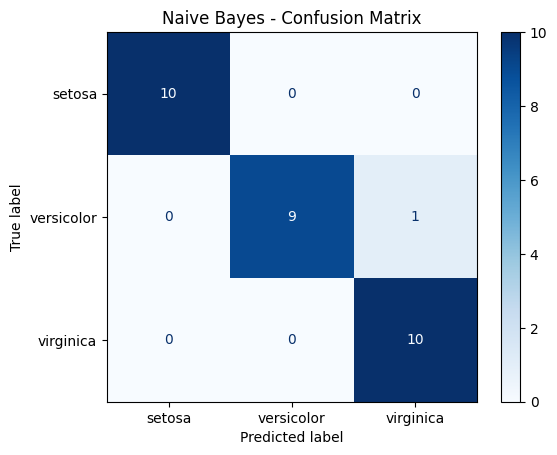

In [33]:
results = []

for name, model in models.items():
    if name in ['SVM', 'KNN']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        scores = cross_val_score(model, scaler.transform(X), y, cv=5)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores = cross_val_score(model, X, y, cv=5)

    acc = accuracy_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Test Accuracy": acc,
        "CV Accuracy (Mean)": scores.mean(),
        "CV Accuracy (Std)": scores.std()
    })

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
    disp.plot(cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()


In [34]:
results

[{'Model': 'Decision Tree',
  'Test Accuracy': 0.9333333333333333,
  'CV Accuracy (Mean)': np.float64(0.9533333333333334),
  'CV Accuracy (Std)': np.float64(0.03399346342395189)},
 {'Model': 'KNN',
  'Test Accuracy': 0.9333333333333333,
  'CV Accuracy (Mean)': np.float64(0.96),
  'CV Accuracy (Std)': np.float64(0.024944382578492935)},
 {'Model': 'SVM',
  'Test Accuracy': 0.9666666666666667,
  'CV Accuracy (Mean)': np.float64(0.9666666666666666),
  'CV Accuracy (Std)': np.float64(0.02108185106778919)},
 {'Model': 'Naive Bayes',
  'Test Accuracy': 0.9666666666666667,
  'CV Accuracy (Mean)': np.float64(0.9533333333333334),
  'CV Accuracy (Std)': np.float64(0.02666666666666666)}]

In [35]:
df_results = pd.DataFrame(results)
print(df_results.sort_values(by='Test Accuracy', ascending=False))

           Model  Test Accuracy  CV Accuracy (Mean)  CV Accuracy (Std)
3    Naive Bayes       0.966667            0.953333           0.026667
2            SVM       0.966667            0.966667           0.021082
1            KNN       0.933333            0.960000           0.024944
0  Decision Tree       0.933333            0.953333           0.033993


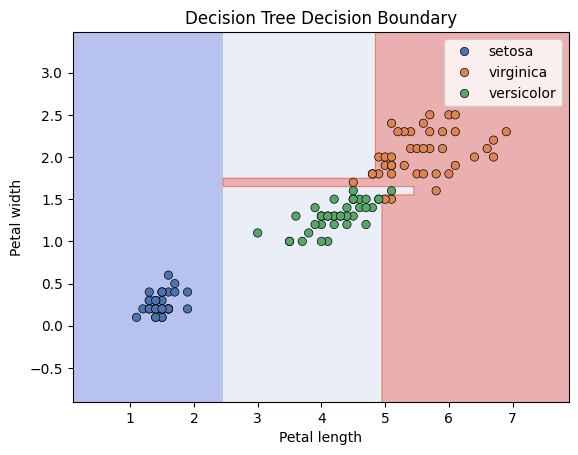

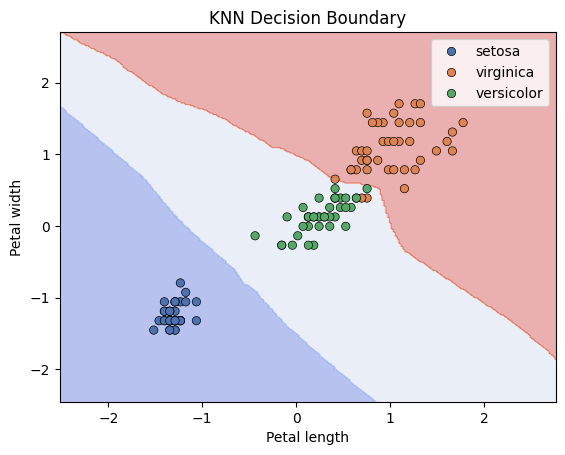

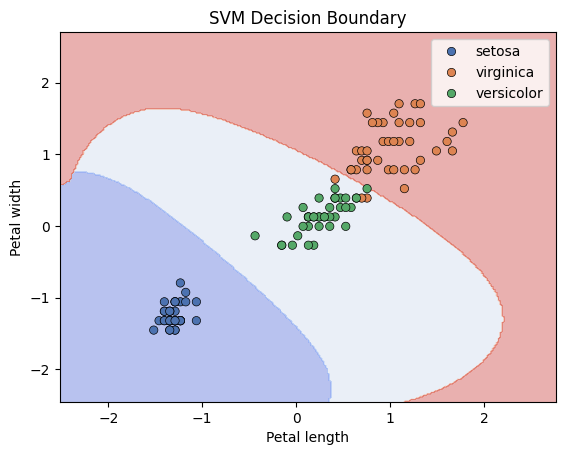

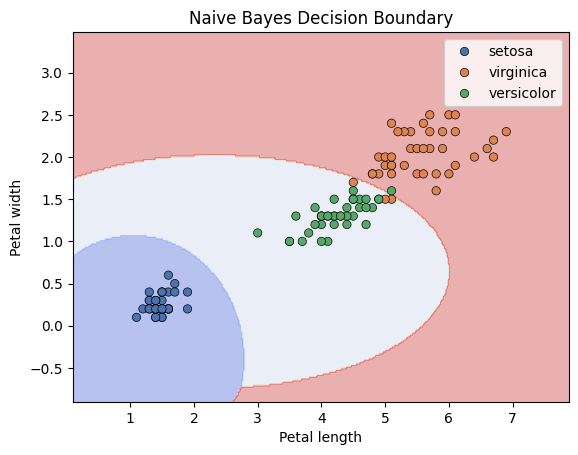

In [36]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette='deep', edgecolor='black')
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title(title)
    plt.show()

# Use only 2 features
X_simple = iris.data[:, 2:4]
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42, stratify=y)
X_train_s_scaled = scaler.fit_transform(X_train_s)
X_test_s_scaled = scaler.transform(X_test_s)

# Plot for each model
for name, model in models.items():
    if name in ['SVM', 'KNN']:
        model.fit(X_train_s_scaled, y_train_s)
        plot_decision_boundary(model, X_train_s_scaled, y_train_s, f"{name} Decision Boundary")
    else:
        model.fit(X_train_s, y_train_s)
        plot_decision_boundary(model, X_train_s, y_train_s, f"{name} Decision Boundary")
